In [1]:
# PRepare IMDB Data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # number of words to consider as features
maxlen = 500 # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
# Train using Embedding layer and SimpleRNN layer
from keras import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [2]:
# SimpleRNN encounters the Vanishing Gradient Problem.  LSTM and GRU are designed to solve this.
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.4950 - acc: 0.7700 - val_loss: 0.4060 - val_acc: 0.8326
Epoch 2/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.2955 - acc: 0.8824 - val_loss: 0.3513 - val_acc: 0.8470
Epoch 3/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.2342 - acc: 0.9113 - val_loss: 0.3101 - val_acc: 0.8826
Epoch 4/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.2010 - acc: 0.9243 - val_loss: 0.2921 - val_acc: 0.8772
Epoch 5/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.1747 - acc: 0.9376 - val_loss: 0.3233 - val_acc: 0.8852
Epoch 6/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.1633 - acc: 0.9416 - val_loss: 0.3175 - val_acc: 0.8612
Epoch 7/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.1408 - acc: 0.9494 - val_loss: 0.3226 - val_acc:

In [6]:
%%bash
# Download weather data
cd /home/stephen/Downloads
mkdir jena_climate
cd jena_climate
wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


--2018-12-04 17:00:30--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.120.162
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.120.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

     0K .......... .......... .......... .......... ..........  0%  713K 19s
    50K .......... .......... .......... .......... ..........  0% 15.1M 10s
   100K .......... .......... .......... .......... ..........  1% 1.43M 9s
   150K .......... .......... .......... .......... ..........  1% 14.4M 7s
   200K .......... .......... .......... .......... ..........  1% 1.64M 7s
   250K .......... .......... .......... .......... ..........  2% 14.6M 6s
   300K .......... .......... .......... .......... ..........  2% 14.4M 5s
   350K .......... .......... .......... .......... ..........  3% 14.4M 5s
   400K .....

In [7]:
# Inspect data
import os
data_dir = '/home/stephen/Downloads/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [8]:
# Parse data
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

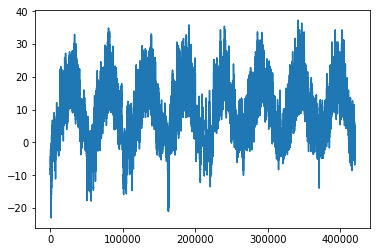

In [10]:
# Plot temperature timeseries
from matplotlib import pyplot as plt

temp = float_data[:, 1] # temperature (in degrees Celsius)
plt.plot(range(len(temp)), temp)

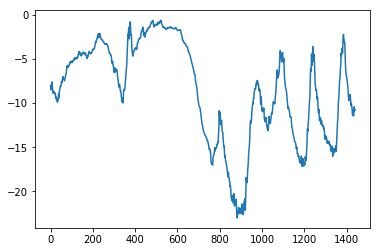

In [11]:
# Plot first ten days of timeseries
plt.plot(range(1440), temp[:1440])

In [12]:
# Parameters
# lookback = 720; observations go back 5 days
# steps = 6; observations sampled one data point per hour
# delay = 144; targets will be 24 hours in the future

In [13]:
# Normalize the data
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [14]:
def generator(data, lookback, delay, min_index, max_index,
                shuffle=False, batch_size=128, step=6):
    """Take current array of float data and yield batches of data from recent past,
    alongside target temperature in the future.
    Since samples are highly redundant, it would be wasteful to allocate every sample.
    Instead generate as needed using the original data.
    
    INPUTS:
        -data: data source.
        -lookback: how far back observations go.
        -delay: how far in the future the target will be.
        -min_index: index in data array that delimit which timesteps to draw from.
        -max_index: index in data array that delimit which timesteps to draw from.
        -shuffle: whether to shuffle samples or draw chronologically.
        -batch_size: number of samples per batch.
        -step: 6 indicates observations sampled one data point per hour.
    
    OUTPUTS:
        -samples: one batch of input data.
        -target: corresponding array of target temps.
    """
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while True:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
       
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [15]:
# Preparing training, validation, and test generators
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step,
    batch_size=batch_size)
val_gen = generator(float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)
test_gen = generator(float_data,
    lookback=lookback,
    delay=delay,
    min_index=300001,
    max_index=None,
    step=step,
    batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [16]:
# Common sense baseline: temp 24 hrs from now is same as it is now.
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

evaluate_naive_method()

0.2897359729905486


In [18]:
# Convert MAE back to Celsius error
celsius_mae = 0.29 * std[1]
celsius_mae

2.5672247338393395

In [19]:
# Basic Machine Learning approach
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 11s 21ms/step - loss: 1.1010 - val_loss: 0.4961
Epoch 2/20
500/500 [==============================] - 11s 21ms/step - loss: 0.3850 - val_loss: 0.3050
Epoch 3/20
500/500 [==============================] - 11s 21ms/step - loss: 0.2861 - val_loss: 0.3175
Epoch 4/20
500/500 [==============================] - 11s 21ms/step - loss: 0.2625 - val_loss: 0.3184
Epoch 5/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2530 - val_loss: 0.3612
Epoch 6/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2444 - val_loss: 0.3156
Epoch 7/20
500/500 [==============================] - 11s 21ms/step - loss: 0.2374 - val_loss: 0.3659
Epoch 8/20
500/500 [==============================] - 11s 21ms/step - loss: 0.2313 - val_loss: 0.3325
Epoch 9/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2263 - val_loss: 0.3316
Epoch 10/20
500/500 [==============================] - 11s 22ms/step - loss: 0.222

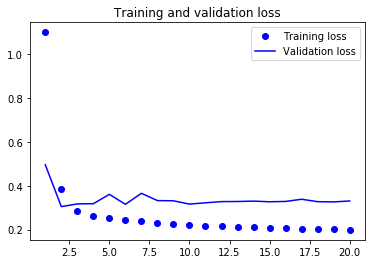

In [20]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 138s 277ms/step - loss: 0.2969 - val_loss: 0.2689
Epoch 2/20
500/500 [==============================] - 138s 277ms/step - loss: 0.2850 - val_loss: 0.2703
Epoch 3/20
499/500 [============================>.] - ETA: 0s - loss: 0.279 - ETA: 0s - loss: 0.2792

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
            dropout=0.2,
            recurrent_dropout=0.2,
            input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                                steps_per_epoch=500,
                                epochs=40,
                                validation_data=val_gen,
                                validation_steps=val_steps)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
            dropout=0.1,
            recurrent_dropout=0.5,
            return_sequences=True,
            input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                    dropout=0.1,
                    recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                                steps_per_epoch=500,
                                epochs=40,
                                validation_data=val_gen,
                                validation_steps=val_steps)

In [ ]:
# Bidirectional RNN
# By processing a sequence both way, a bidirectional RNN is able to catch patterns that may
# have been overlooked by a one-direction RNN
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(
                        layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                                steps_per_epoch=500,
                                epochs=40,
                                validation_data=val_gen,
                                validation_steps=val_steps)